In [82]:
import pandas as pd

no5 = pd.read_csv("summarise_no5.csv")
no5.head()

,Unnamed: 0,Exp name,File name,Time stamp,Map,Map medium,Map large,Density,Density effective,Density occurance
0,0,no5-change,17-10-06_13-18-33_244500000_304500000,749999.0,0.933663,1.000000,0.9,0.262354,0.585325,0.592072
1,1,no5-change,17-10-06_13-18-33_244500000_304500000,1749999.0,0.822772,0.833663,-1.0,0.169897,0.426888,0.457396
2,2,no5-change,17-10-06_13-18-33_244500000_304500000,2749999.0,0.800000,-1.000000,-1.0,0.168579,0.445312,0.555884
3,3,no5-change,17-10-06_13-18-33_244500000_304500000,3749999.0,0.000000,-1.000000,-1.0,0.146753,0.434625,-1.000000
4,4,no5-change,17-10-06_13-18-33_244500000_304500000,4749999.0,0.800990,0.900000,-1.0,0.196655,0.476752,0.485283


In [83]:
no5_testing = pd.read_csv("summarise200000point0.csv")
no5_testing.head()

,Unnamed: 0,Exp name,File name,Time stamp,Map,Map medium,Map large,Density,Density effective,Density occurance
0,0,no5-change,17-10-06_13-18-33_244500000_304500000,58750000.0,0.231683,0.231683,-1.0,0.013525,0.050628,0.043107
1,1,no5-change,17-10-06_13-18-33_244500000_304500000,52750000.0,0.047525,0.000000,-1.0,0.006165,0.011235,0.015263
2,2,no5-change,17-10-06_13-18-33_244500000_304500000,47750000.0,0.168812,0.115842,-1.0,0.030005,0.003286,0.019973
3,3,no5-change,17-10-06_13-18-33_244500000_304500000,46750000.0,0.594059,0.788449,-1.0,0.053638,0.114515,0.109036
4,4,no5-change,17-10-06_13-18-33_244500000_304500000,45750000.0,0.756436,0.744224,-1.0,0.087170,0.151663,0.142538


In [84]:
joined = no5.merge(no5_testing,on=["File name","Time stamp"],how="left")
joined.head()

,Unnamed: 0_x,Exp name_x,File name,Time stamp,Map_x,Map medium_x,Map large_x,Density_x,Density effective_x,Density occurance_x,Unnamed: 0_y,Exp name_y,Map_y,Map medium_y,Map large_y,Density_y,Density effective_y,Density occurance_y
0,0,no5-change,17-10-06_13-18-33_244500000_304500000,749999.0,0.933663,1.000000,0.9,0.262354,0.585325,0.592072,45.0,no5-change,0.966337,1.000000,1.0,0.259265,0.575373,0.574289
1,1,no5-change,17-10-06_13-18-33_244500000_304500000,1749999.0,0.822772,0.833663,-1.0,0.169897,0.426888,0.457396,44.0,no5-change,0.749505,0.749505,-1.0,0.172083,0.421150,0.451921
2,2,no5-change,17-10-06_13-18-33_244500000_304500000,2749999.0,0.800000,-1.000000,-1.0,0.168579,0.445312,0.555884,43.0,no5-change,0.700000,-1.000000,-1.0,0.163586,0.468446,0.414534
3,3,no5-change,17-10-06_13-18-33_244500000_304500000,3749999.0,0.000000,-1.000000,-1.0,0.146753,0.434625,-1.000000,42.0,no5-change,1.000000,-1.000000,-1.0,0.144031,0.350906,0.418660
4,4,no5-change,17-10-06_13-18-33_244500000_304500000,4749999.0,0.800990,0.900000,-1.0,0.196655,0.476752,0.485283,41.0,no5-change,0.700990,0.800000,-1.0,0.204956,0.484999,0.467470


/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Map_x', ylabel='Map_y'>

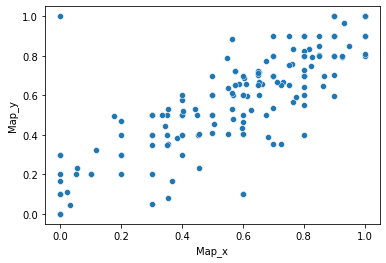

In [85]:
import seaborn as sns

sns.scatterplot("Map_x","Map_y",data=joined)

<AxesSubplot:ylabel='Count'>

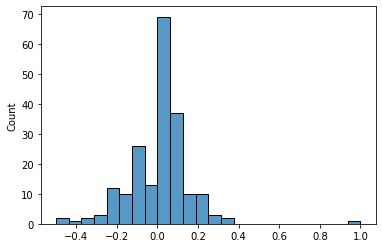

In [87]:
sns.histplot(joined["Map_y"] - joined["Map_x"])

In [88]:
(joined["Map_y"] - joined["Map_x"]).mean()

0.0013567769356893058

<AxesSubplot:xlabel='Density', ylabel='Density'>

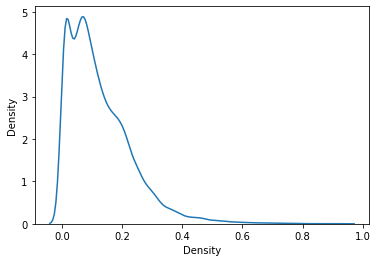

In [11]:
sns.kdeplot(no2["Density"])

In [24]:
import torch.nn.functional as F
import torch

w = torch.rand((50,))

b = torch.rand((50,))
x = torch.rand((50,))
y = torch.rand((50,))

w.requires_grad_()	#设定参数张量w需要梯度
mse=F.mse_loss(y,x*w+b)	#构造函数，这里构造MSE损失函数。第一个参数是实际值，第二个参数是预测值
#grads=torch.autograd.grad(mse,[w])	#第一个参数为待求梯度的函数，第二个参数为一个列表，里面是需要梯度的张量
#返回一个梯度张量的列表

mse.backward()	#反向传播，直接将梯度附加到作为函数参数的所有需要梯度的张量上
w.grad	#查看需要梯度的张量上附加的梯度

#进行一次自动求导后，计算图信息会被清除，再次求导会报错。在调用grad和backward时设定retain_graph参数为True以保留计算图信息

tensor([ 3.1432e-02,  4.6411e-03,  4.3153e-03, -3.9886e-03,  1.0648e-02,
         3.7836e-02,  7.8999e-03,  3.5276e-03,  8.1017e-03,  2.8821e-02,
         1.1570e-05,  1.1392e-03, -1.6656e-03,  4.3749e-04,  1.0851e-02,
         1.3556e-02,  7.9702e-03,  1.4270e-02,  3.4594e-03, -1.7526e-04,
         3.1222e-02,  2.0484e-02, -1.4020e-03,  7.9378e-03,  1.0381e-02,
        -3.2662e-05, -2.5660e-03, -5.4967e-03, -7.9514e-03, -8.4727e-03,
        -3.9756e-05, -1.2954e-04,  1.3488e-02,  1.3145e-02,  7.2587e-03,
         8.2422e-04, -3.4455e-03,  2.0550e-02, -1.6969e-03, -4.0541e-03,
        -1.8687e-03,  3.8898e-03,  9.8480e-03,  2.1059e-02,  1.8920e-03,
         1.9117e-03,  1.4408e-02,  3.5766e-02, -3.5959e-04,  1.4639e-03])

In [36]:
w1 = torch.rand((50,))

b1 = torch.rand((50,))
x1 = torch.rand((50,))

w2 = torch.rand((50,))

b2 = torch.rand((50,))
x2 = torch.rand((50,))

w1.requires_grad_()	#设定参数张量w需要梯度
b1.requires_grad_()
w2.requires_grad_()
b2.requires_grad_()

x1_after = x1*w1+b1
x2_after = x2*w2+b2

x1_after = torch.where(x1_after<x2_after,x1_after,torch.zeros_like(x1_after))

y = torch.rand((50,))

mse=F.mse_loss(y,x1_after)	#构造函数，这里构造MSE损失函数。第一个参数是实际值，第二个参数是预测值
#grads=torch.autograd.grad(mse,[w])	#第一个参数为待求梯度的函数，第二个参数为一个列表，里面是需要梯度的张量
#返回一个梯度张量的列表

mse.backward()	#反向传播，直接将梯度附加到作为函数参数的所有需要梯度的张量上
w2.grad	#查看需要梯度的张量上附加的梯度

In [29]:
w2.grad

In [14]:
import torch

def f(x,r1,r2):
    return torch.where(x <= 0.5, r1 , r2)

x = torch.autograd.Variable(torch.rand((50,)), requires_grad=True)
r1 = torch.autograd.Variable(torch.rand((50,)), requires_grad=True)
r2 = torch.autograd.Variable(torch.rand((50,)), requires_grad=True)
torch.autograd.grad(f(x, r1, r2), x)

RuntimeError: grad can be implicitly created only for scalar outputs

In [7]:
import numpy as np

x = np.array([320, 312, 313, 302],dtype=np.uint32)
y = np.array([0, 219, 217, 243],dtype=np.uint32)
c = np.array([3, 5, 4, 0],dtype=np.uint32)
p = np.array([0, 1, 1, 0],dtype=np.uint32)
ecd = x + np.left_shift(y, 10) + np.left_shift(c, 18) + np.left_shift(p, 22)
ecd

array([ 993600, 5729592, 5465401,  511278], dtype=uint32)

In [8]:
np.bitwise_and(ecd, 511)

array([320, 312, 313, 302], dtype=uint32)

In [11]:
np.right_shift(np.bitwise_and(ecd, 261888), 10)

array([202, 219, 217, 243], dtype=uint32)